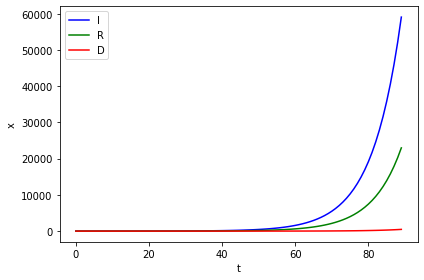

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy
import kal_python as kal


sigma = 1.0/4.6/10/2
beta = 2.2
xi = 1.0/280
gamma = 1.0/5.0/4
delta = 0.001
h = 1 # 1サイクルあたりの日数
T = 90 # 日数

def seirs(x):
    S = x[0]
    E = x[1]
    I = x[2]
    R = N-S-E-I
    dS = mu * N - beta * S * I / N + xi * R - nu * S
    dE = beta * S * I / N - sigma * E - nu * E
    dI = sigma * E - gamma * I - nu * I
    dx = np.array([dS,dE,dI])
    return dx

class function:
    def __init__(self):
        self.A = np.array([[-sigma, beta, 0, 0],
                          [sigma, -(gamma+delta), 0, 0],
                          [0, gamma, -xi, 0],
                          [0, delta, 0, 0]])
        
    def update(self,t,x):
        dx = self.A.dot(x)
        return dx

x0 = np.array([[0],[2],[0],[0]]) # 初期条件
corona = function()
diff_eq = kal.differential_equation(4,corona,h,T,0,x0)
diff_eq.solve()

x_fig = diff_eq.x[1:]
fig = kal.t_x_plot(3,T)
fig.set_label(["I","R","D"])
fig.show(diff_eq.t,x_fig)


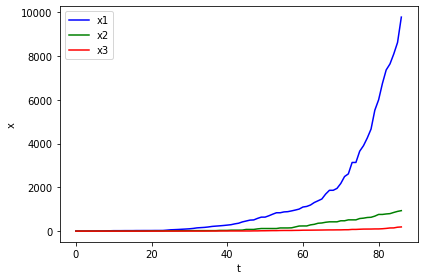

In [2]:
# データ読み込み
t = np.arange(0,T,1)
data = pd.read_csv('time_series_covid19/time_series_covid19_JPN.csv',header=None)
y = np.array(data)
# 描画
fig = kal.t_x_plot(3,y.shape[1])
fig.show(t[:y.shape[1]],y[:,:y.shape[1]])
y_data = copy.deepcopy(y)


In [3]:
data.shape

(3, 87)